# Исследование зависимости от заданной размерности и числа обусловленности квадратичных функций

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
from functions.user_functions import funtion_generator
from functions.optimization import adagrad, conjugate_grad_descent

Сетка размерностей и чисел обусловленности.

In [3]:
# Order.
M_SIZE = 10
M_list = np.linspace(2, 11, M_SIZE).astype(int)

# Condition number µ.
CN_SIZE = 10
CN_list = np.linspace(1.0, 19.0, CN_SIZE)

print('Order (size) list:\n', M_list)
print('Condition numbers:\n', CN_list)

Order (size) list:
 [ 2  3  4  5  6  7  8  9 10 11]
Condition numbers:
 [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19.]


Генерируем набор функций по заданной сетке размерностей и чисел обусловленности.

In [4]:
A_arr = np.empty((M_SIZE,CN_SIZE), dtype=object)
b_arr = np.empty((M_SIZE,CN_SIZE), dtype=object)
func_arr = np.empty((M_SIZE,CN_SIZE), dtype=object)
grad_func_arr = np.empty((M_SIZE,CN_SIZE), dtype=object)

for m, M_var in enumerate(M_list):
    for k, CN_var in enumerate(CN_list):
        A_arr[m,k], b_arr[m,k], _, func_arr[m,k], grad_func_arr[m,k] = funtion_generator(M=M_var, cond_number=CN_var)

Проверка собственных чисел у сгенерированных функций.

In [5]:
for m, M_var in enumerate(M_list):
    for k, CN_var in enumerate(CN_list):
        eigvals = np.linalg.eigvalsh(A_arr[m,k])
        cond_A = eigvals[-1] / eigvals[0]
        print('Размерность', M_var, ', Собственные числа', eigvals)
        print('Числа обусловленности: заданное <--> вычисленное:\n', CN_var, '<-->', np.round(cond_A,2))

Размерность 2 , Собственные числа [1. 1.]
Числа обусловленности: заданное <--> вычисленное:
 1.0 <--> 1.0
Размерность 2 , Собственные числа [1. 3.]
Числа обусловленности: заданное <--> вычисленное:
 3.0 <--> 3.0
Размерность 2 , Собственные числа [1. 5.]
Числа обусловленности: заданное <--> вычисленное:
 5.0 <--> 5.0
Размерность 2 , Собственные числа [1. 7.]
Числа обусловленности: заданное <--> вычисленное:
 7.0 <--> 7.0
Размерность 2 , Собственные числа [1. 9.]
Числа обусловленности: заданное <--> вычисленное:
 9.0 <--> 9.0
Размерность 2 , Собственные числа [ 1. 11.]
Числа обусловленности: заданное <--> вычисленное:
 11.0 <--> 11.0
Размерность 2 , Собственные числа [ 1. 13.]
Числа обусловленности: заданное <--> вычисленное:
 13.0 <--> 13.0
Размерность 2 , Собственные числа [ 1. 15.]
Числа обусловленности: заданное <--> вычисленное:
 15.0 <--> 15.0
Размерность 2 , Собственные числа [ 1. 17.]
Числа обусловленности: заданное <--> вычисленное:
 17.0 <--> 17.0
Размерность 2 , Собственные чи

Оптимизация.

In [6]:
method_names = ['adam', 'CGD']
N_METH = len(method_names)
x_optim_arr = np.empty((N_METH,), dtype=object)
trajectory_arr = np.empty((N_METH,), dtype=object)
iter_counter_arr = np.empty((N_METH,), dtype=object)

# Tolerance.
eps = 1e-5

for idx in range(N_METH):
    x_optim_arr[idx] = np.empty((M_SIZE,CN_SIZE), dtype=object)
    trajectory_arr[idx] = np.empty((M_SIZE,CN_SIZE), dtype=object)
    iter_counter_arr[idx] = np.zeros((M_SIZE,CN_SIZE))

    for m, M_var in enumerate(M_list):
        for k in range(CN_SIZE):
            match idx:
                case 0:
                    '''
                    x_optim_arr[idx][m,k], trajectory, iter_counter_arr[idx][m,k], _ = adam(
                        grad_func=grad_func_arr[m,k],
                        x_init=np.array([1.5]*M_var),
                        learning_rate=1e-3,
                        beta1=0.95,
                        beta2=0.95,
                        eps_zero=1e-3,
                        tolerance=eps,
                        printoutput=False
                        )
                    '''
                    x_optim_arr[idx][m,k], trajectory, iter_counter_arr[idx][m,k], _ = adagrad(
                        grad_func=grad_func_arr[m,k],
                        x_init=np.array([1.5]*M_var),
                        learning_rate=1e-1,
                        eps_zero=1e-6,
                        tolerance=eps,
                        printoutput=False
                        )
                case 1:
                    x_optim_arr[idx][m,k], trajectory, iter_counter_arr[idx][m,k], _ = conjugate_grad_descent(
                        A=A_arr[m,k],
                        b=b_arr[m,k],
                        x_init=np.array([1.5]*M_var),
                        tolerance=eps,
                        printoutput=False
                        )
            trajectory_arr[idx][m,k] = np.array(trajectory)

## Результаты на графиках

Настройки форматирования графиков.

In [7]:
user_figsize = (12,6)
user_fontsize = 14
user_tickfontsize = 12
user_markersize = 12

### Траектории функций 2-го порядка

In [8]:
CN_PLOT = CN_list.copy()

x1_min = -10.0
x1_max = 10.0
x2_min = -10.0
x2_max = 10.0
N = 1000

x = np.empty((2,), dtype=object)
x[0] = np.linspace(x1_min, x1_max, N)
x[1] = np.linspace(x2_min, x2_max, N)
X, Y = np.meshgrid(x[0], x[1])

N_FUNC = len(CN_PLOT)

Z = np.empty((N_FUNC,), dtype=object)

for k, CN_var, func in zip(range(N_FUNC), CN_PLOT, func_arr[0,:]):
    Z[k] = np.zeros((X.shape[0], X.shape[1]))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[k][i,j] = func(np.array([X[i,j], Y[i,j]]))

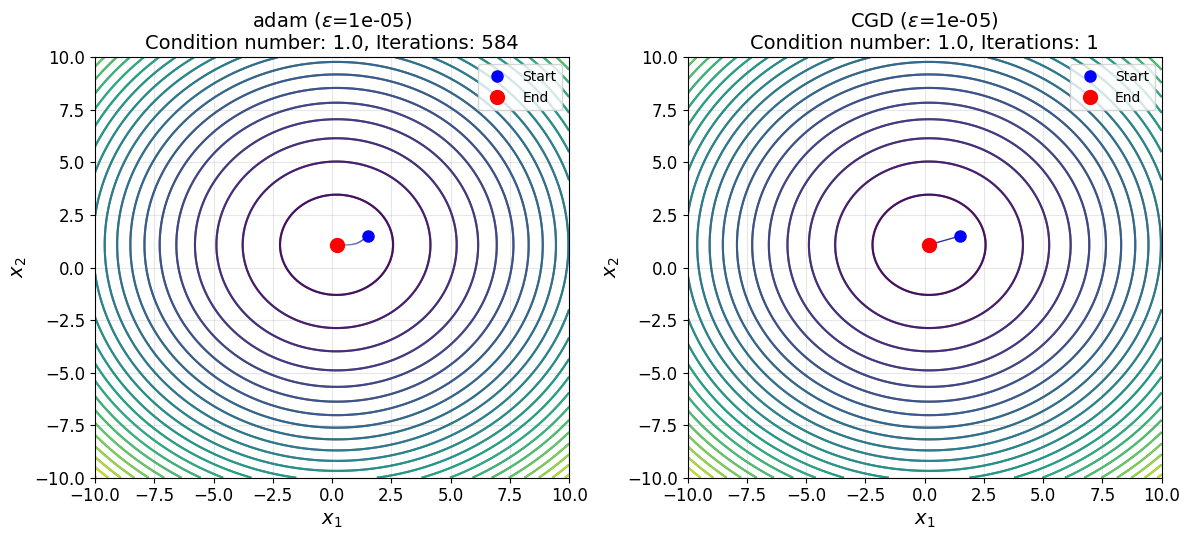

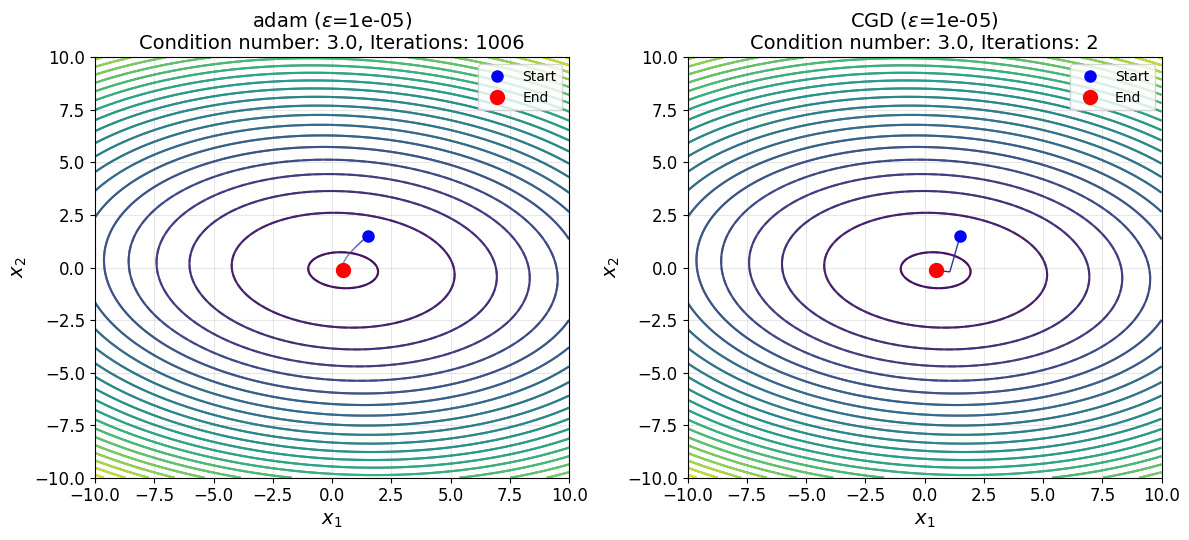

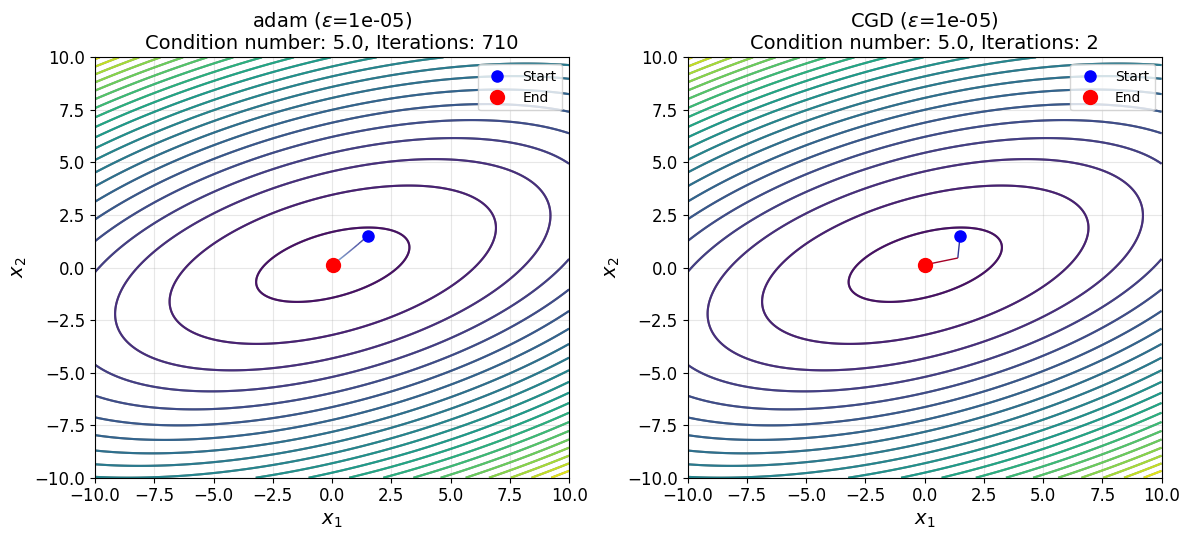

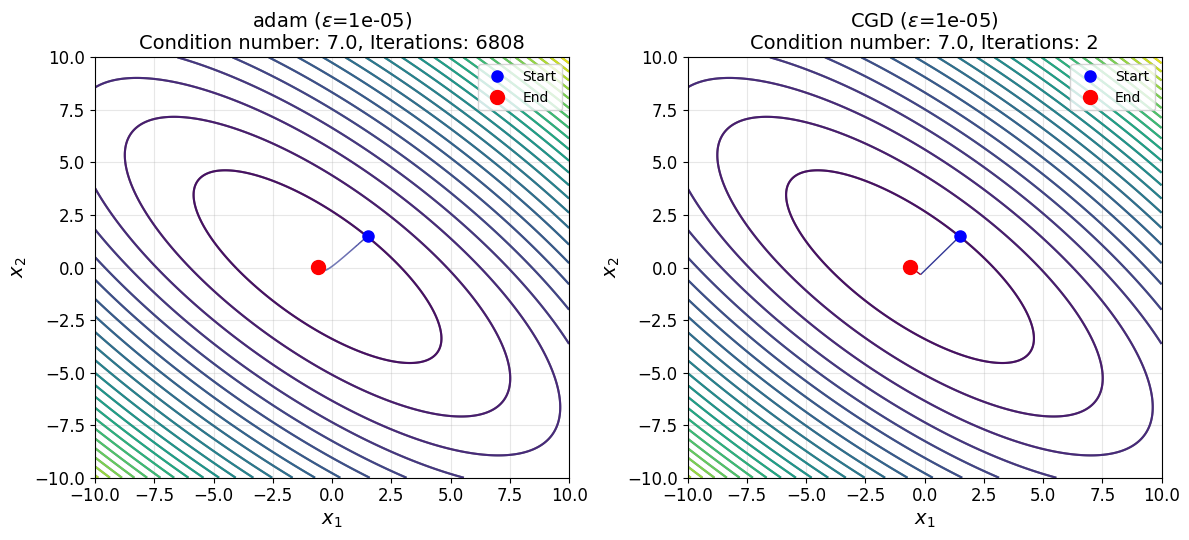

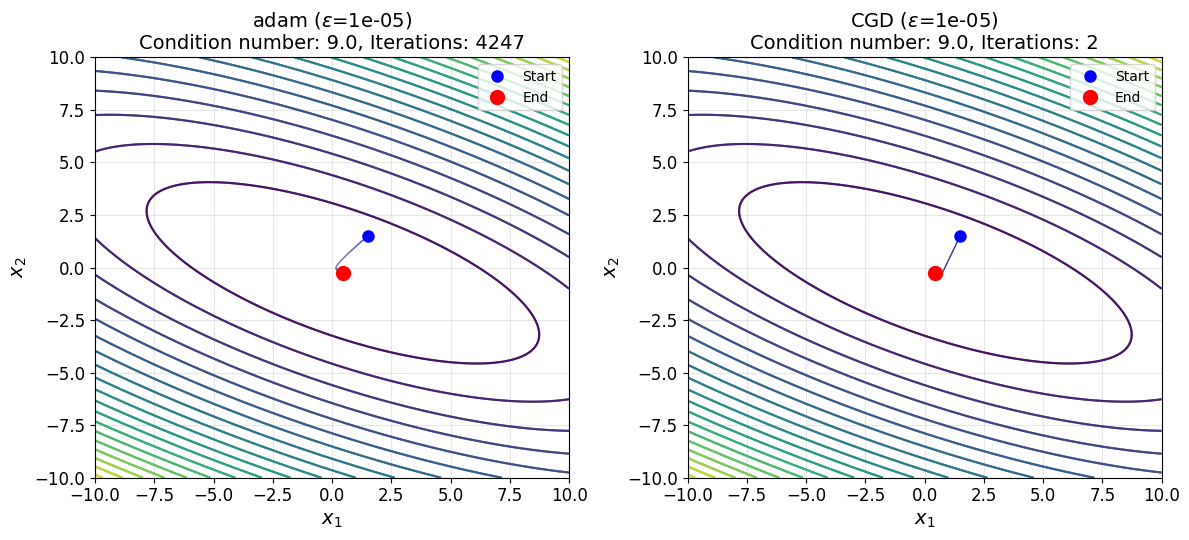

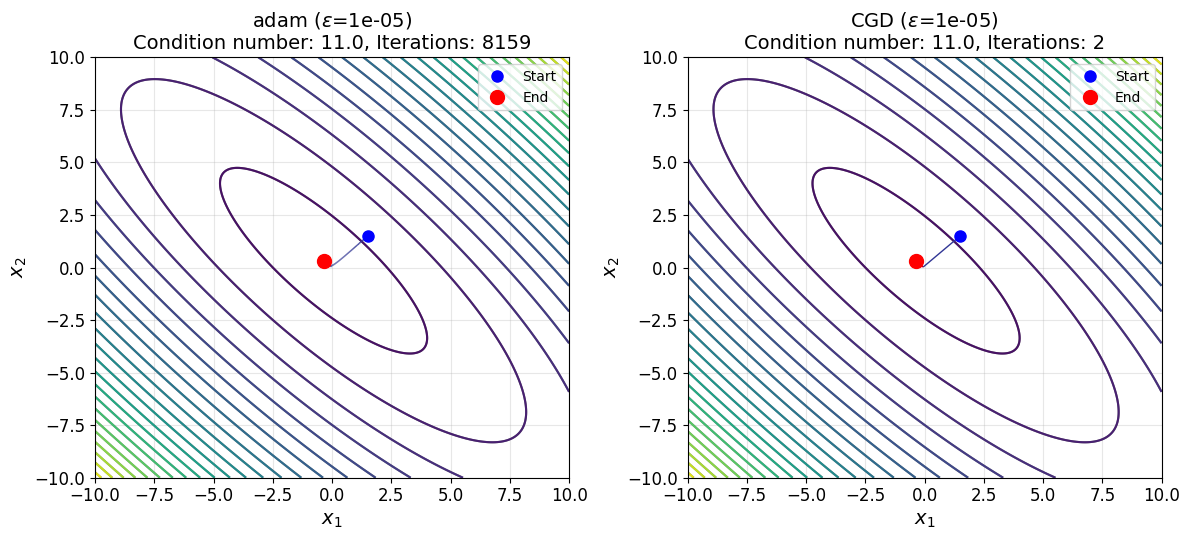

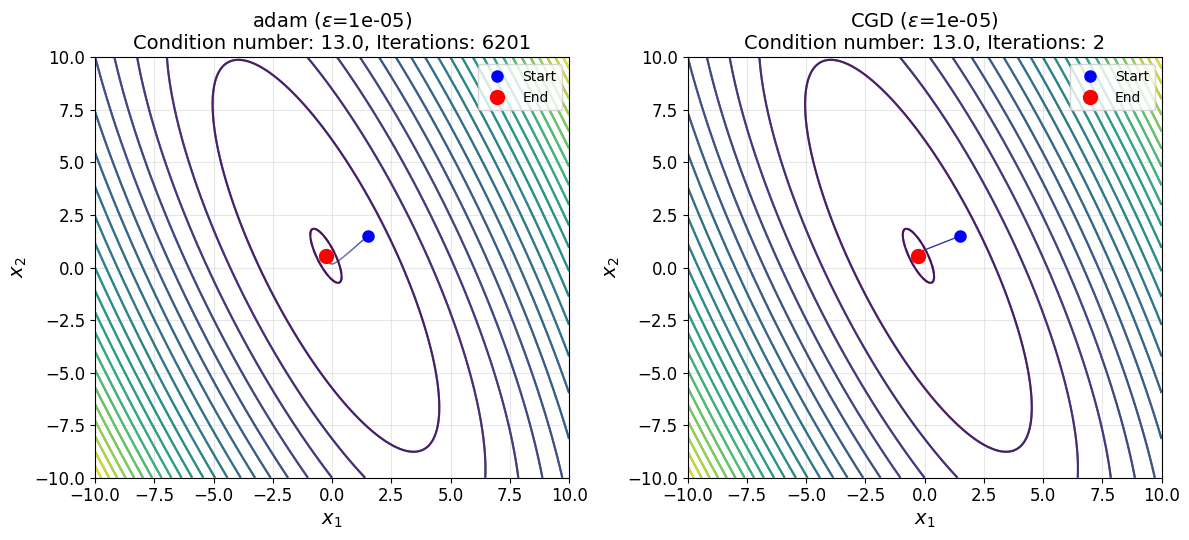

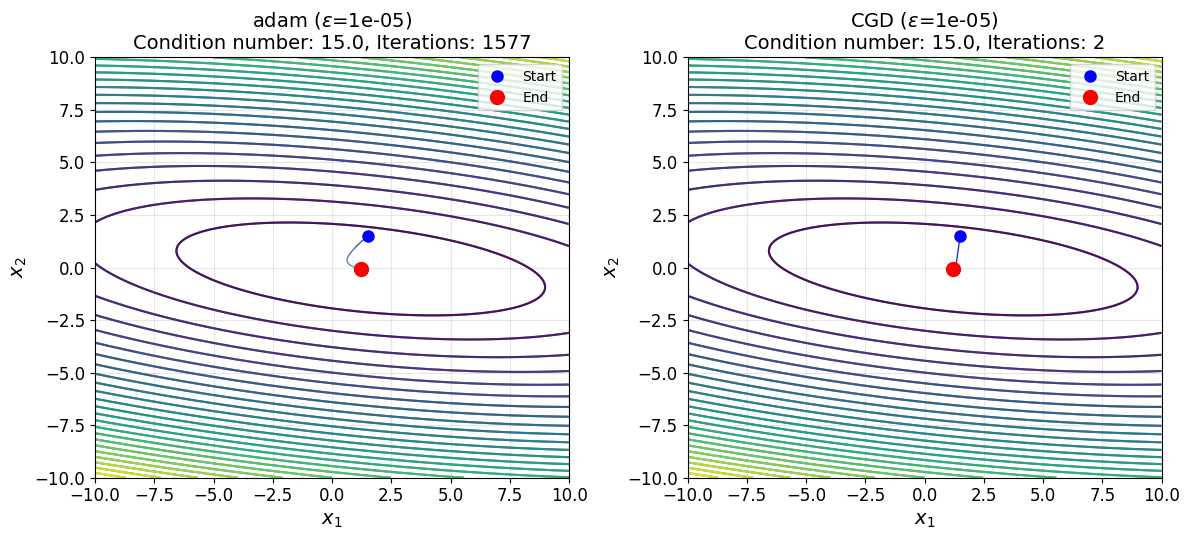

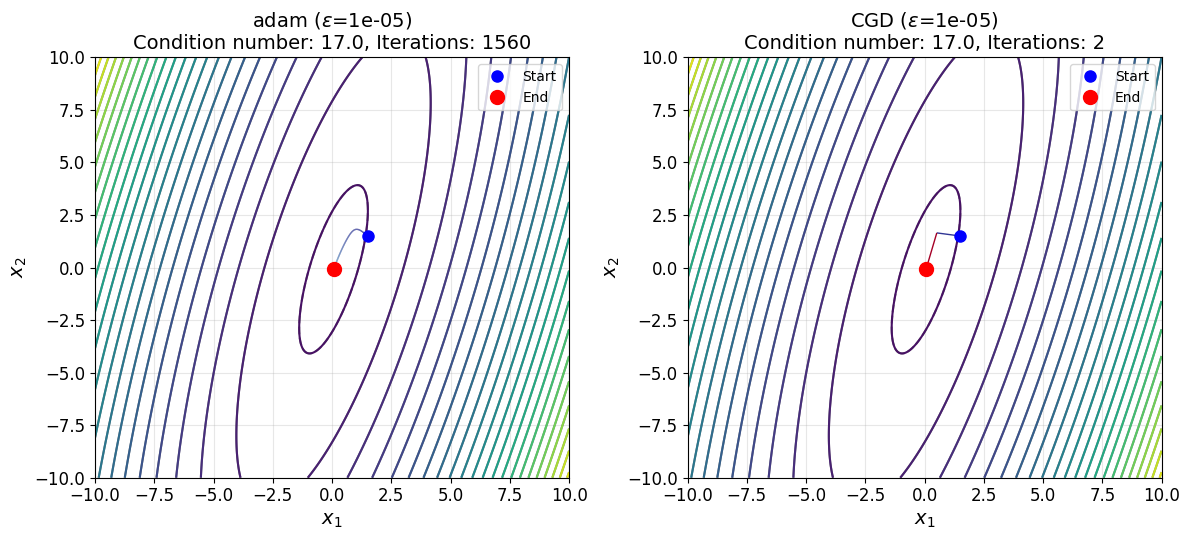

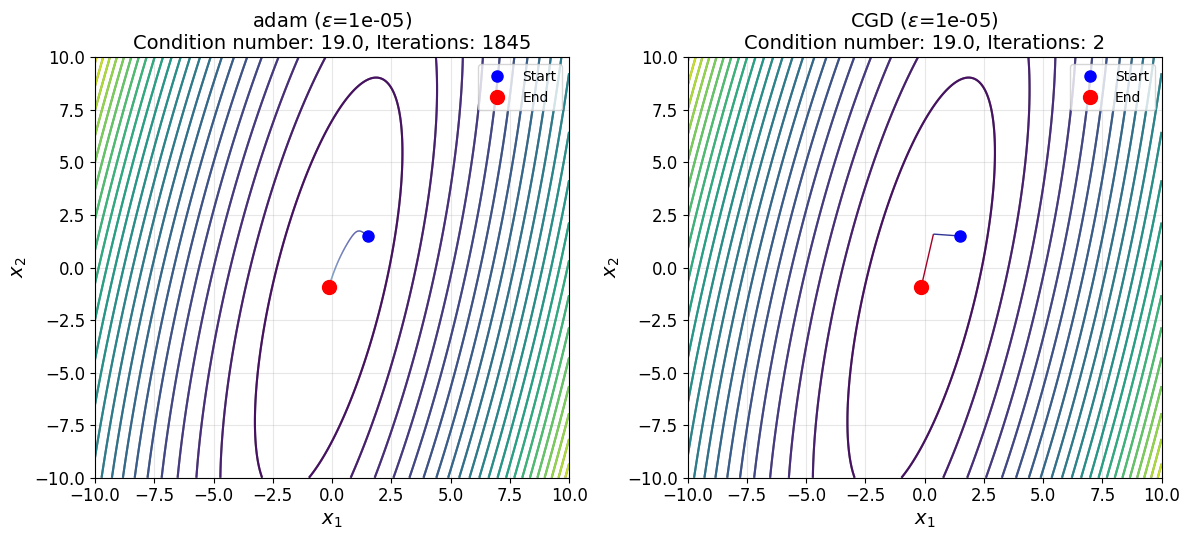

In [9]:
# Начальное приближение для функции 2х переменных.
x_init = np.array([1.5]*2)
for k, z, CN_val in zip(range(N_FUNC), Z, CN_PLOT):
    fig, axs = plt.subplots(ncols=N_METH, nrows=1, figsize=(6*N_METH, 5.5))
    for idx, ax in enumerate(axs):
        contour = ax.contour(X, Y, z, levels=25, colors='black', alpha=0.5)
        ax.contour(X, Y, z, levels=25, cmap='viridis')
        ax.set_xlabel('$x_1$', fontsize=user_fontsize)
        ax.set_ylabel('$x_2$', fontsize=user_fontsize)
        ax.set_title(method_names[idx] + r' ($\epsilon$=' + str(eps) + ')\n' + 'Condition number: ' + str(CN_val) + ', Iterations: ' +  str(int(iter_counter_arr[idx][0,k])), fontsize=user_fontsize)
        
        # Подготовка сегментов для LineCollection
        points = np.array([trajectory_arr[idx][0,k][:, 0], trajectory_arr[idx][0,k][:, 1]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # Создание LineCollection с цветами, зависящими от индекса (шага)
        lc = LineCollection(segments, cmap='RdYlBu_r', linewidth=1.0)
        lc.set_array(np.linspace(0, 1, len(segments))) # цвет от 0 (начало) до 1 (конец)
        line = ax.add_collection(lc)
        
        # Отмечаем точки
        ax.plot(x_init[0], x_init[1], 'bo', markersize=8, label='Start')
        ax.plot(x_optim_arr[idx][0,k][0], x_optim_arr[idx][0,k][1], 'ro', markersize=10, label='End')
            
        ax.tick_params(axis='x', labelsize=user_tickfontsize)
        ax.tick_params(axis='y', labelsize=user_tickfontsize)
        
        ax.legend()
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('readme_img/general_function_optimization_img/trajectory_plots_condition_number_' + str(int(CN_val)) + '.png', bbox_inches='tight')
    plt.show()

### Графики числа итераций

Преобразуем в таблицы.

In [10]:
iter_counter_tbl_set = np.empty((CN_SIZE,), dtype=object)

col_labels = ['µ']
for m, M_var in enumerate(M_list):
    col_labels.append('order=' + str(M_var))

for idx in range(N_METH):
    iter_counter_tbl = CN_list.copy()
        
    iter_counter_tbl = np.hstack((np.matrix(iter_counter_tbl).T, iter_counter_arr[idx].T))    
    iter_counter_tbl_set[idx] = pd.DataFrame(iter_counter_tbl, columns=col_labels)
    iter_counter_tbl_set[idx][col_labels[1:]] = iter_counter_tbl_set[idx][col_labels[1:]].astype(int)

In [11]:
for ttl, tbl in zip(method_names, iter_counter_tbl_set):
    print(ttl + ': Количество итераций (@ eps=' + str(eps) + ')')
    display(tbl)

adam: Количество итераций (@ eps=1e-05)


µ  order=2  order=3  order=4  order=5  order=6  order=7  order=8  \
0   1.0      584     2475      832     1695     5028     4533     2768   
1   3.0     1006     1617     1126     1058     2460     2643     1173   
2   5.0      710     4050     3232     2286     3292     2119     2312   
3   7.0     6808     1516     2402     3009     2641     3228     2672   
4   9.0     4247     4349     3200     1482     4832     3411     4011   
5  11.0     8159      740     4555     3814     4329     3639     4151   
6  13.0     6201     6560     3839     1972     6268     3979     4858   
7  15.0     1577     1886     1130     2666     5822     5392     6206   
8  17.0     1560     1554     1995     8542     8918     3124     3651   
9  19.0     1845    14482      950     6261    11848     7622     2552   

   order=9  order=10  order=11  
0     2323      4497      5075  
1     2477      1792      1791  
2     1961      1897      2437  
3     2469      2374      1977  
4     2869      6195      5123  
5     5008      2457      5188  
6     2094      6434      9104  
7     4662      6483      7993  
8     8594      5575      4182  
9     9710      5844      7474

CGD: Количество итераций (@ eps=1e-05)


µ  order=2  order=3  order=4  order=5  order=6  order=7  order=8  \
0   1.0        1        2        3        2        3        3        3   
1   3.0        2        3        4        5        5        6        7   
2   5.0        2        3        4        5        6        7        8   
3   7.0        2        3        4        5        6        7        8   
4   9.0        2        3        4        5        6        7        8   
5  11.0        2        3        4        5        6        7        8   
6  13.0        2        3        4        5        6        7        8   
7  15.0        2        3        4        5        6        7        8   
8  17.0        2        3        4        5        6        7        8   
9  19.0        2        3        4        5        6        7        8   

   order=9  order=10  order=11  
0        3         3         3  
1        8         9         9  
2        9         9         9  
3        8        10        11  
4        9         8        11  
5        9        10        11  
6        9        10        11  
7        9        10        11  
8        9        10        10  
9        9         9        11

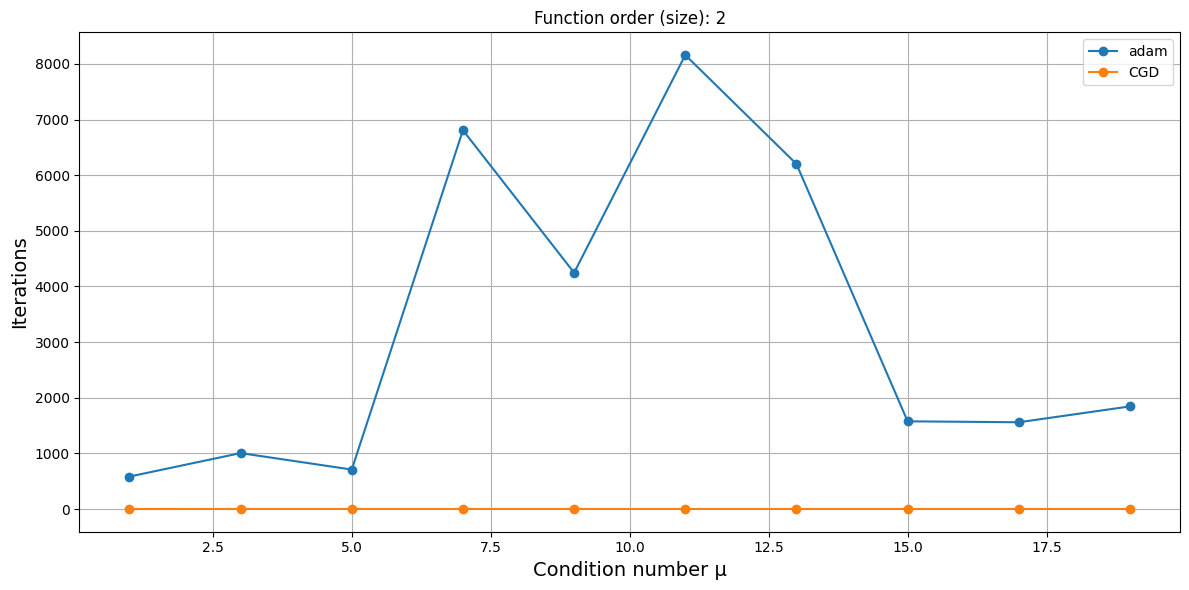

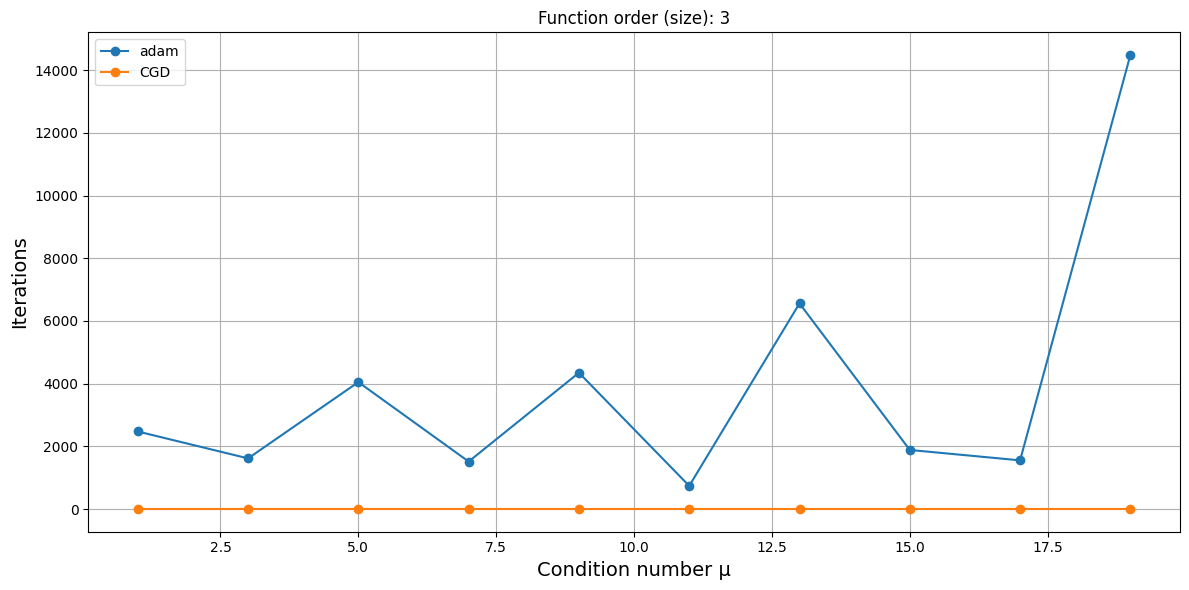

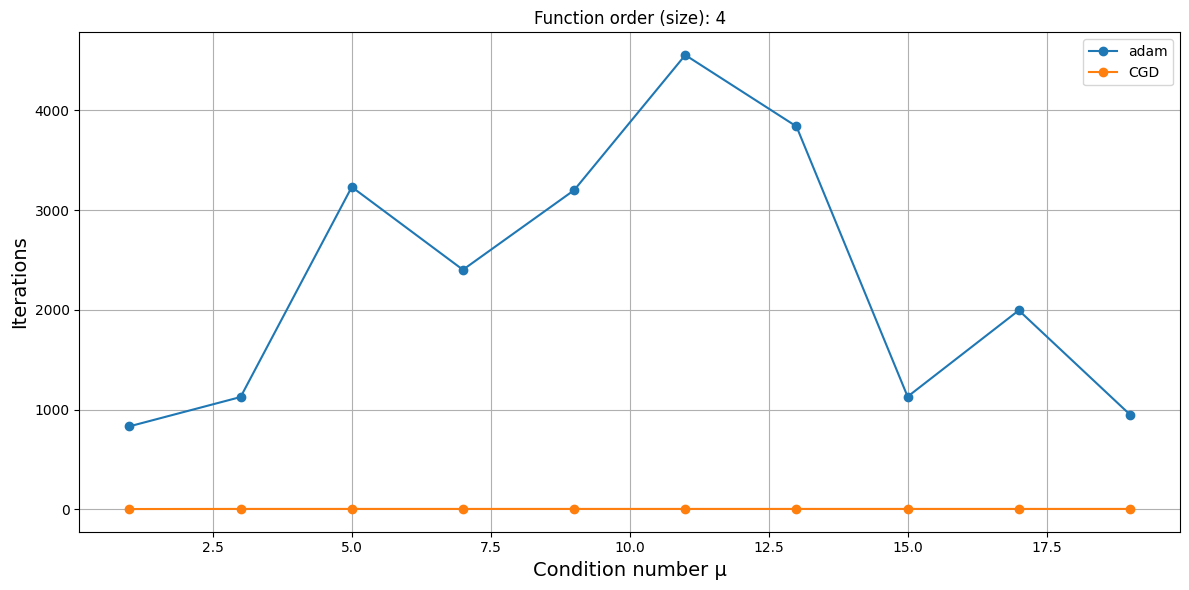

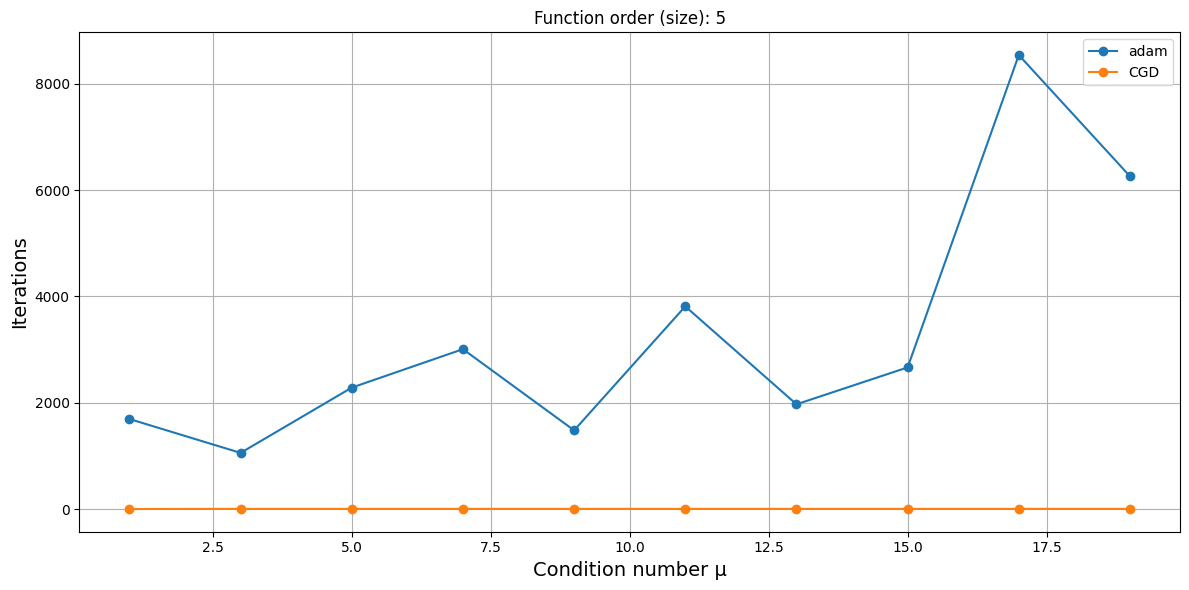

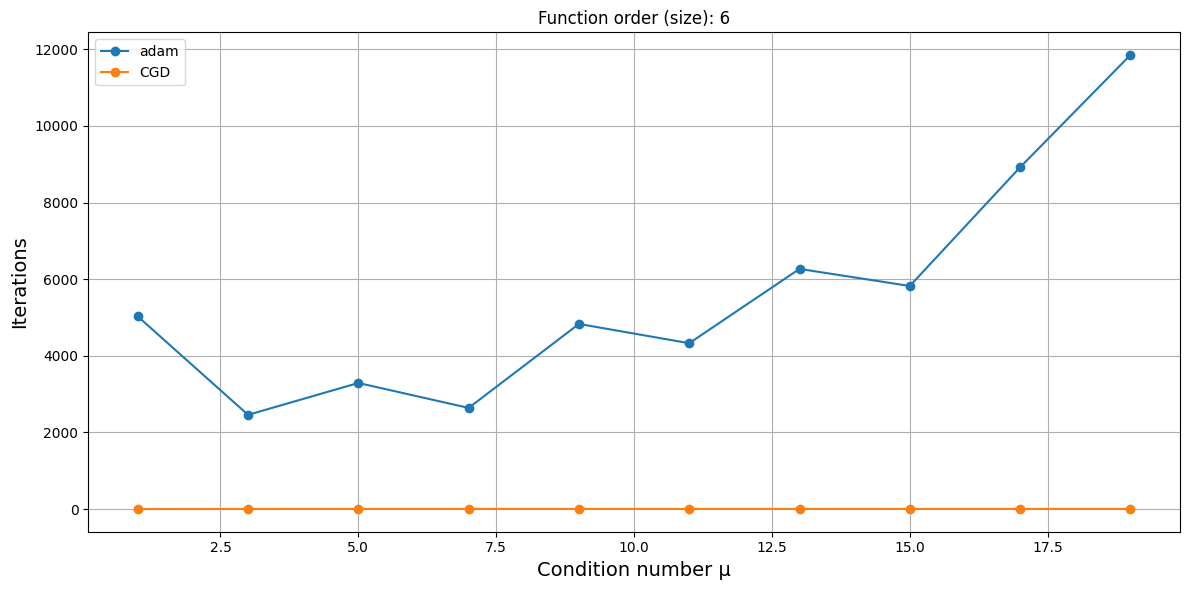

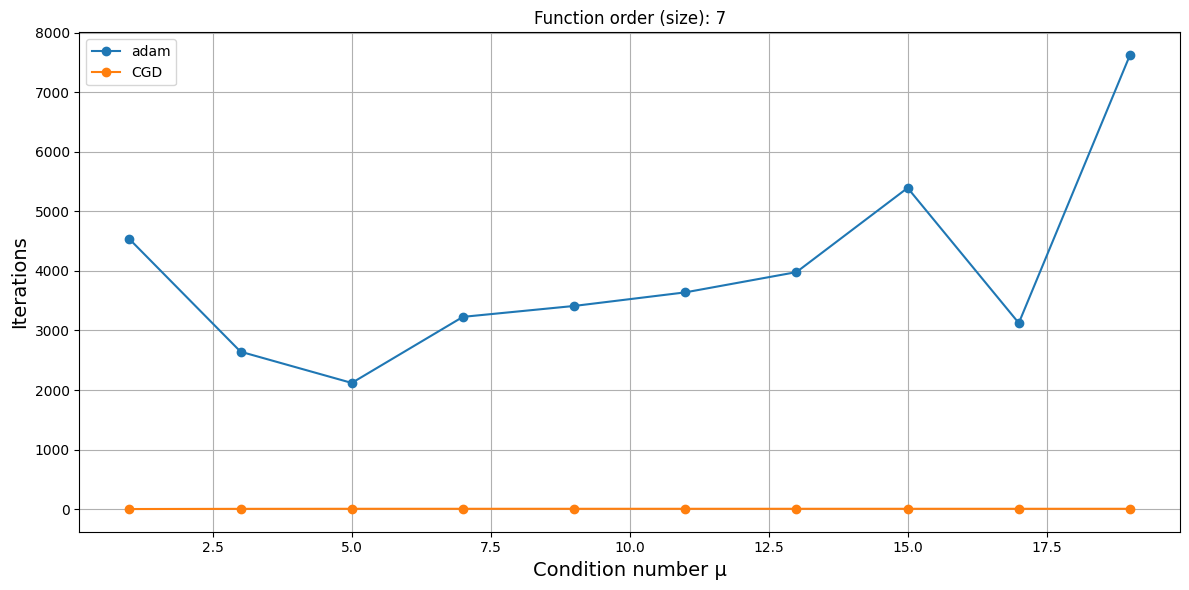

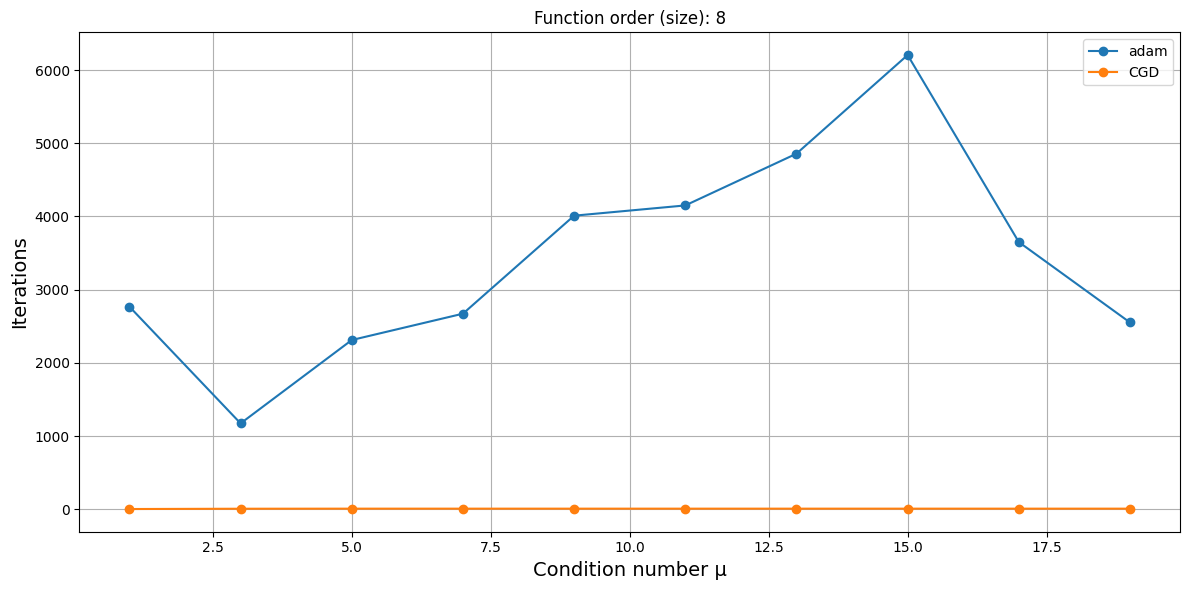

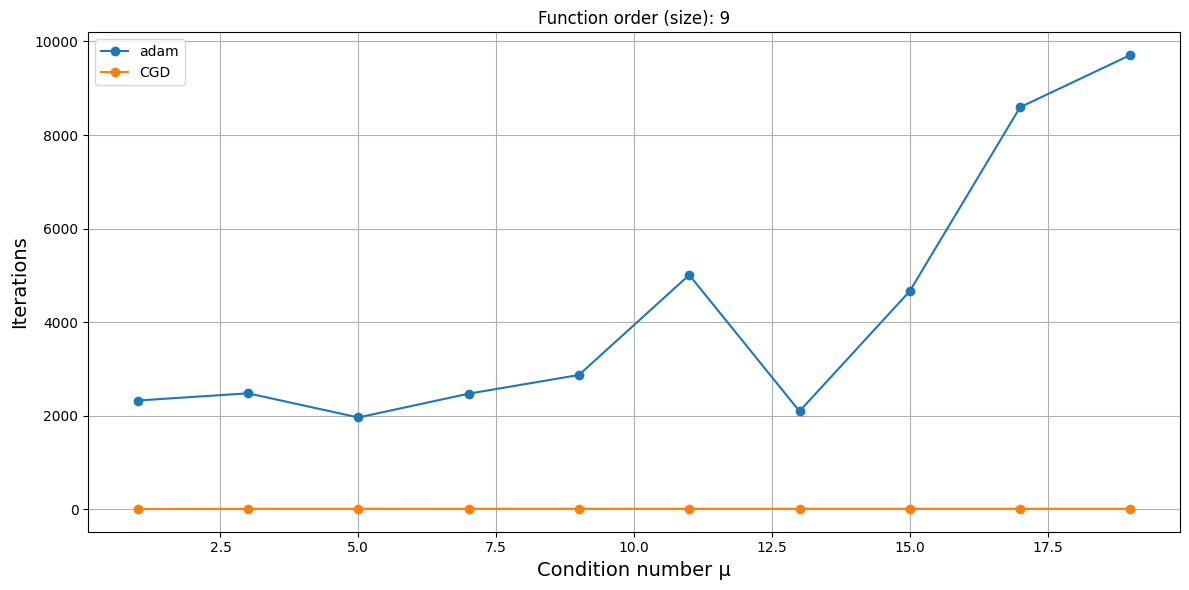

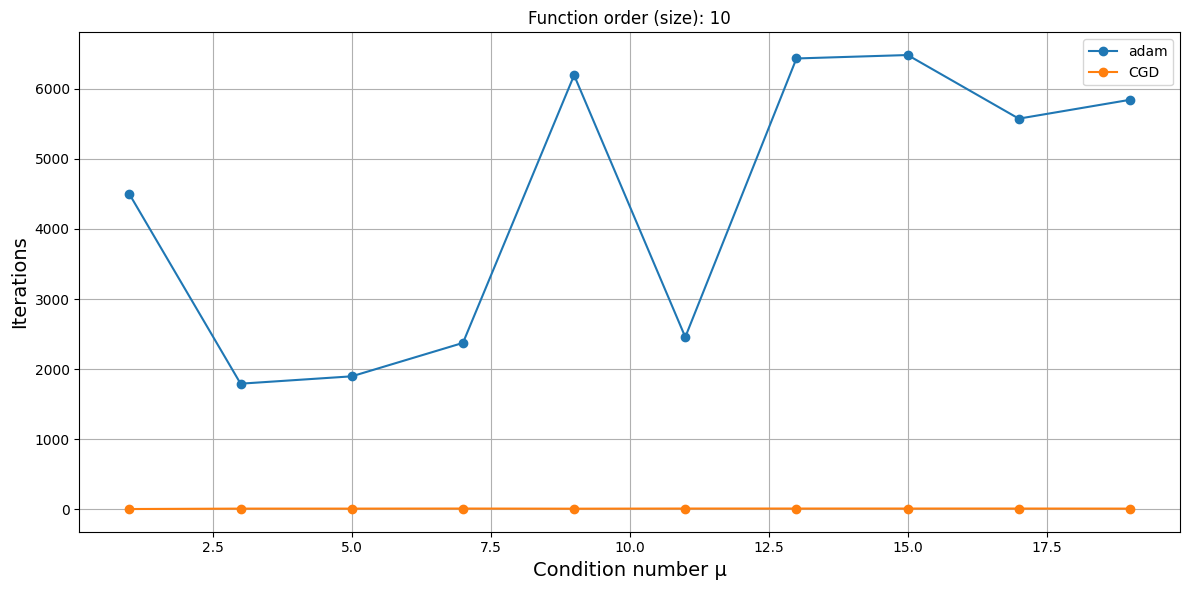

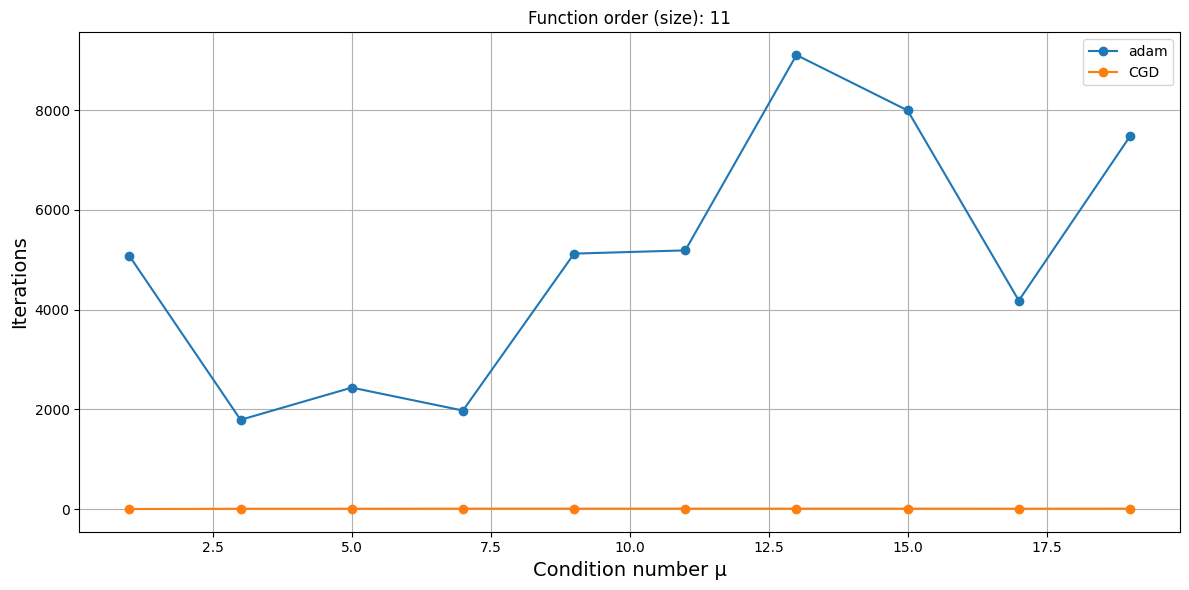

In [12]:
for m, M_var in enumerate(M_list):
        plt.figure(figsize=user_figsize)
        for ttl, tbl in zip(method_names, iter_counter_tbl_set):
                plt.plot(
                        tbl['µ'],
                        tbl.iloc[:,1+m],
                        marker='.', markersize=user_markersize, label=ttl)
        plt.legend()
        plt.title('Function order (size): ' + str(M_var))
        plt.grid()
        plt.xlabel('Condition number µ', fontsize=user_fontsize)
        plt.ylabel('Iterations', fontsize=user_fontsize)
        plt.tight_layout()
        plt.savefig('readme_img/general_function_optimization_img/iter_count_order_' + str(M_var) + '.png', bbox_inches='tight')
        plt.show()

## Генератор таблиц в приложения

In [13]:
from functions.user_functions import update_readme_section

In [14]:
for tbl, section in zip(iter_counter_tbl_set, method_names):
    update_readme_section(tbl, readme_path='general_function_optimization.md', tbl_name=section + r': Количество итераций ($\epsilon$=' + str(eps) + ')', section=section)